labels: [1 1 1 1 0 0 0 0 2 2]
[[5.5 0. ]
 [1.5 0. ]
 [8.5 0. ]]


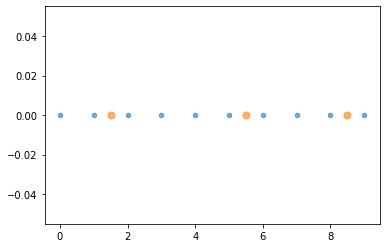

In [9]:
import numpy as np
from sklearn.cluster import KMeans
from kneed import KneeLocator
X = np.array([[x,0] for x in range(10)],dtype=np.int32)
#X = np.array([[1,1,3,-10],[2,1,3,-5],[1,2,4,10],[101,99,12,5],[100,100,5,5],[102,100,12,0], [-50,-50,55,5],[-51,-48,-25,10],[-50,-52,-2,-5]], dtype=np.int32)
kmeans = KMeans(random_state=0, n_init=10).fit(X)

def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
    
        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
        
        sse.append(curr_sse)
    sseRange = range(1,len(sse)+1)
    kn = KneeLocator(sseRange, sse, curve='convex', direction='decreasing')
    result = KMeans(n_clusters=kn.knee).fit(points)
    print('labels:',result.labels_)
    return result.cluster_centers_


c = calculate_WSS(X,len(X)-1)
x = [a[0] for a in X]
y = [a[1] for a in X]
print(c)
import matplotlib.pyplot as plt
plt.scatter(x, y, alpha = 0.6, s=20)
plt.scatter([a[0] for a in c], [a[1] for a in c], alpha = 0.6, s=50)